In [24]:
import numpy as np
import pandas as pd

ind_df = pd.read_csv('indicadores_bienestar_2014-2.csv', sep=',', header=0, index_col=0,skip_blank_lines=True, thousands=',')
ind_df.head()

,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes,Acceso a servicios de salud.1,Hogares con acceso a banda ancha.1
Entidad,,,,,,,,,,,,,,,,,,,,,
Estados Unidos Mexicanos,84.5,33.70,88.8,5.7,47.7,5.05,28.3,53.7,77.3,75.0,...,43.6,7.6,13.8,57.29,3.9,59.7,11.5,67.5,1.0,71.6
Aguascalientes,87.9,37.92,98.0,8.4,37.2,5.60,34.7,63.2,78.1,75.9,...,28.2,2.3,10.5,43.91,4.0,60.0,9.1,100.0,1.0,94.9
Baja California,80.6,51.46,94.7,4.1,30.9,4.05,38.1,62.7,84.7,74.2,...,22.2,1.1,7.0,39.91,2.6,61.4,6.8,95.7,1.1,49.5
Baja California Sur,84.9,43.85,91.6,3.0,52.6,5.44,37.2,66.9,85.0,76.2,...,22.1,1.6,6.3,39.05,4.6,66.1,6.1,80.5,1.0,74.8
Campeche,89.3,27.10,89.8,11.2,61.2,8.12,32.7,63.5,73.5,75.4,...,43.8,6.7,17.7,62.08,3.7,61.0,4.2,44.9,0.8,52.7


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(ind_df)
ind_pca = pca.transform(ind_df)
ind_pca_df = pd.DataFrame(ind_pca)
ind_pca_df.index = ind_df.index
ind_pca_df.columns = ["CP1","CP2"]
ind_pca_df.head()

,CP1,CP2
Entidad,,
Estados Unidos Mexicanos,-307.184345,72.388817
Aguascalientes,170.090092,-138.191138
Baja California,207.713643,-204.295553
Baja California Sur,-96.967797,427.763313
Campeche,87.502277,231.950919


In [26]:
print(pca.explained_variance_ratio_) 

[ 0.57179173  0.41166329]


Wow, el primer continente explica un 57.1% de la varianza mientras que el segundo un 41.1%, sumados es un 98.2% de varianza, muy bien.

NameError: name 'unicode' is not defined

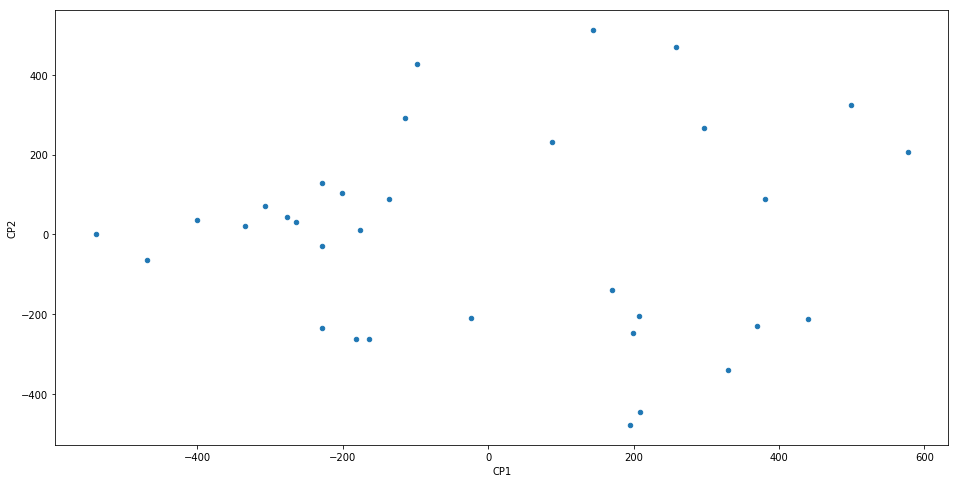

In [38]:
%matplotlib inline

ax = ind_pca_df.plot(kind='scatter', x='CP1', y='CP2', figsize=(16,8))

for i, estado in enumerate(ind_pca_df.index):
    edo = unicode(edo, encoding='utf-8')
    ax.annotate(edo, (ind_pca_df.iloc[i].CP1, ind_pca_df.iloc[i].CP2))

Text(0.5,1,'Selección de K con el método del codo')

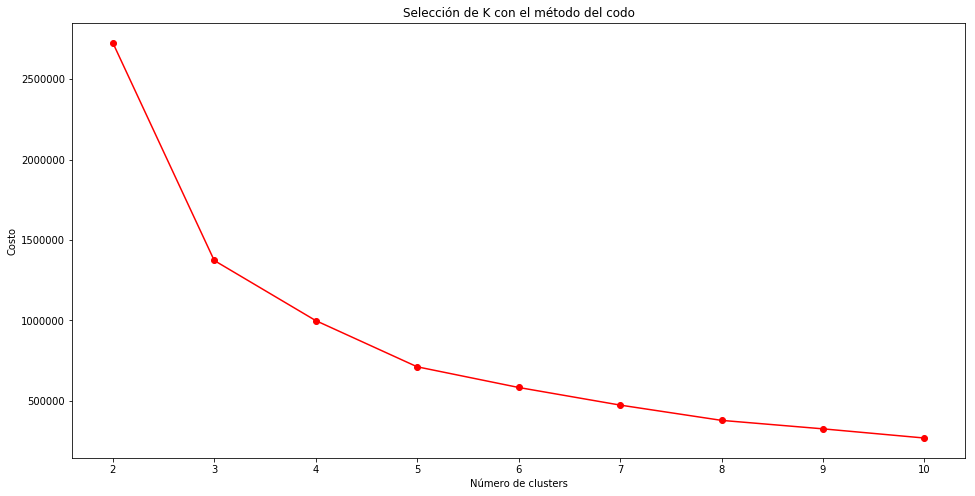

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 10
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(red_df)
    costos.append(-kmeans.score(red_df))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')

El codo mas pronunciado es el 3

NameError: name 'unicode' is not defined

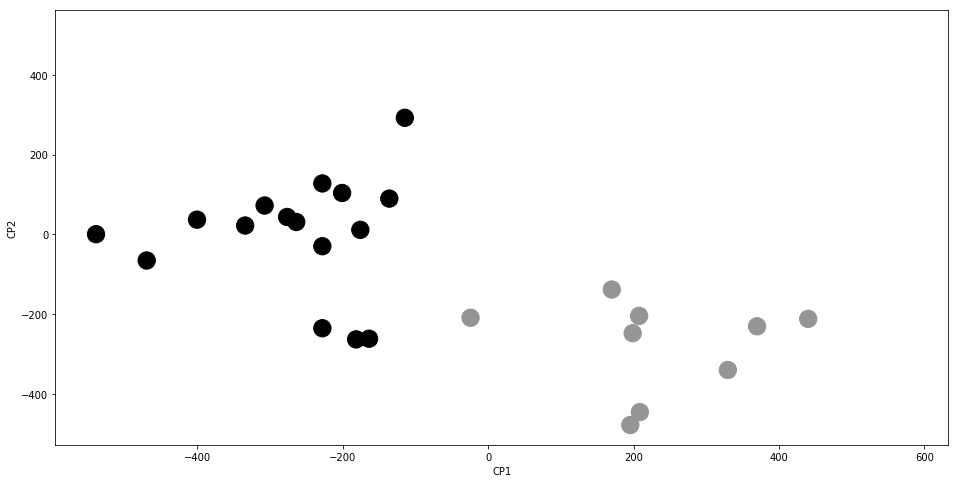

In [39]:
K = 3
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(ind_df)
ind_pca_df['grupos'] = pd.Series(clusters.labels_, index=ind_pca_df.index)


ax = ind_pca_df.plot(kind='scatter', x='CP1', y='CP2', 
                     c=ind_pca_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, estado in enumerate(ind_pca_df.index):
    estado = unicode(estado, encoding='utf-8')
    ax.annotate(estado, (ind_pca_df.iloc[i].CP1, ind_pca_df.iloc[i].CP2))

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
prototipos_df = pd.DataFrame(scaler.fit_transform(kmeans.cluster_centers_))

prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = ind_df.columns
prototipos_df.index.names = ['Prototipo']
prototipos_df.columns.names = ['Variable']

prototipos_df

Variable,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes,Acceso a servicios de salud.1,Hogares con acceso a banda ancha.1
Prototipo,,,,,,,,,,,,,,,,,,,,,
P1,0.645669,0.000000,0.00000,0.4,0.766921,0.871531,1.00000,1.000000,0.139187,1.000000,...,1.000000,0.833583,0.660577,0.787516,0.409091,0.476347,0.000000,0.000000,0.138462,0.000000
P2,1.000000,0.489188,0.38699,1.0,1.000000,1.000000,0.00000,0.000000,0.000000,0.721649,...,0.857818,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.393161,0.000000,1.000000
P3,0.000000,1.000000,1.00000,0.0,0.000000,0.000000,0.17194,0.588101,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.015748,1.000000,1.000000,0.347897


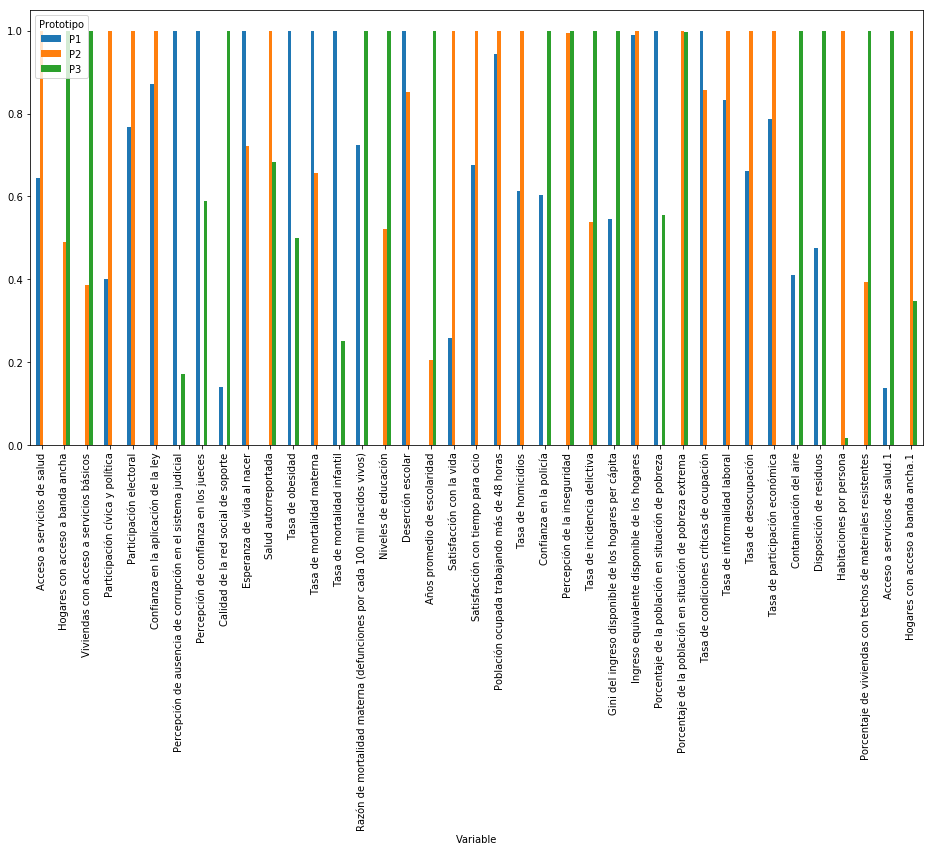

In [34]:
prototipos_df.T.plot(figsize=(16,8),kind="bar")

Los países en el cluster P1 son los que tienen mas bajos indices de indicadores, P2 es el que mas altos indices tiene, mientras que P3 se le acerca mucho pero es el mas promedio.